# Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset 

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#import os
#print(os.listdir())

In [52]:
ds = pd.read_excel('drive/MyDrive/Churn_Modelling.xlsx')

In [53]:
ds.shape

(10000, 14)

In [54]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


# Visualizations

## Univariate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


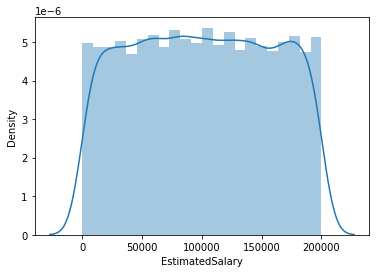

In [55]:
sns.distplot(ds['EstimatedSalary'],hist=True)

## Bivariate

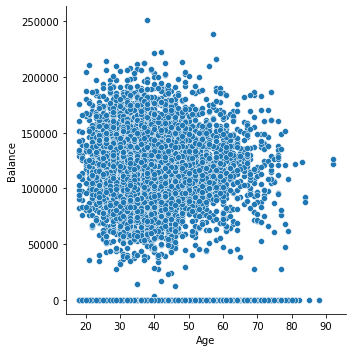

In [56]:
sns.relplot(x='Age',y='Balance',data=ds)

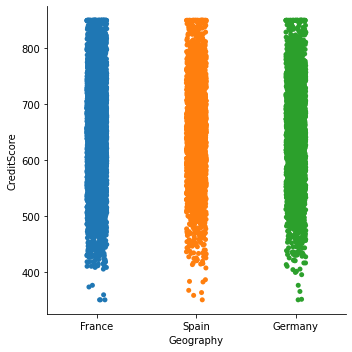

In [57]:
#categorical data
sns.catplot(x='Geography',y='CreditScore',data=ds)

## Multivariate

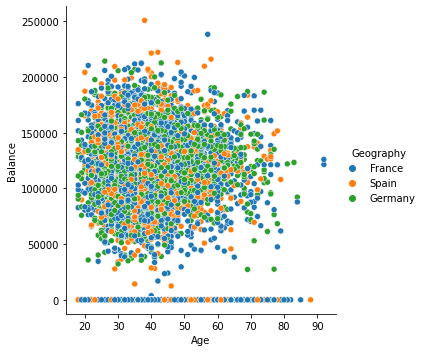

In [58]:
sns.relplot(x='Age',y='Balance',hue='Geography',data=ds)

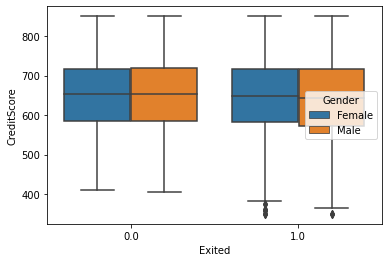

In [59]:
#categorical data
sns.boxplot(x='Exited',y='CreditScore',hue='Gender',data=ds)

# Descriptive Statistics

In [61]:
ds.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Handling the missing(null) values

In [24]:
ds.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [25]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#no null values found , so no need to handle.

# Split the data into dependent and independent variables

In [26]:
x=ds.iloc[:,3:13].values
print(x.shape)
y=ds.iloc[:,13:14].values
print(y.shape)

(10000, 10)
(10000, 1)


# Finding and Replacing Outliers

In [27]:
ds.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


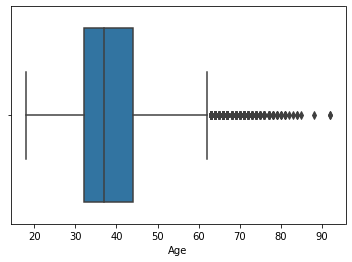

In [28]:
sns.boxplot(ds["Age"])

In [29]:
q0 = ds["Age"].describe()["25%"]

In [30]:
q1 = ds["Age"].describe()["75%"]

In [31]:
iqr=q1-q0

In [32]:
lb = q0 -(1.5*iqr)
ub = q1 + (1.5*iqr)

In [33]:
ds[ds["Age"]<lb]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [34]:
ds[ds["Age"]>ub]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59.0,15623944.0,T'ien,511.0,Spain,Female,66.0,4.0,0.00,1.0,1.0,0.0,1643.11,1.0
85,86.0,15805254.0,Ndukaku,652.0,Spain,Female,75.0,10.0,0.00,2.0,1.0,1.0,114675.75,0.0
104,105.0,15804919.0,Dunbabin,670.0,Spain,Female,65.0,1.0,0.00,1.0,1.0,1.0,177655.68,1.0
158,159.0,15589975.0,Maclean,646.0,France,Female,73.0,6.0,97259.25,1.0,0.0,1.0,104719.66,0.0
181,182.0,15789669.0,Hsia,510.0,France,Male,65.0,2.0,0.00,2.0,1.0,1.0,48071.61,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754.0,15705174.0,Chiedozie,656.0,Germany,Male,68.0,7.0,153545.11,1.0,1.0,1.0,186574.68,0.0
9765,9766.0,15777067.0,Thomas,445.0,France,Male,64.0,2.0,136770.67,1.0,0.0,1.0,43678.06,0.0
9832,9833.0,15814690.0,Chukwujekwu,595.0,Germany,Female,64.0,2.0,105736.32,1.0,1.0,1.0,89935.73,1.0
9894,9895.0,15704795.0,Vagin,521.0,France,Female,77.0,6.0,0.00,2.0,1.0,1.0,49054.10,0.0


In [35]:
#Replacing the outlier
outlier_list = list(ds[ds["Age"] > ub]["Age"])

In [36]:
print(outlier_list)

[66.0, 75.0, 65.0, 73.0, 65.0, 72.0, 67.0, 67.0, 79.0, 80.0, 68.0, 75.0, 66.0, 66.0, 70.0, 63.0, 72.0, 64.0, 64.0, 70.0, 67.0, 82.0, 63.0, 69.0, 65.0, 69.0, 64.0, 65.0, 74.0, 67.0, 66.0, 67.0, 63.0, 70.0, 71.0, 72.0, 67.0, 74.0, 76.0, 66.0, 63.0, 66.0, 68.0, 67.0, 63.0, 71.0, 66.0, 69.0, 73.0, 65.0, 66.0, 64.0, 69.0, 64.0, 77.0, 74.0, 65.0, 70.0, 67.0, 69.0, 67.0, 74.0, 69.0, 74.0, 74.0, 64.0, 63.0, 63.0, 70.0, 74.0, 65.0, 72.0, 77.0, 66.0, 65.0, 74.0, 88.0, 63.0, 71.0, 63.0, 64.0, 67.0, 70.0, 68.0, 72.0, 71.0, 66.0, 75.0, 67.0, 73.0, 69.0, 76.0, 63.0, 85.0, 67.0, 74.0, 76.0, 66.0, 69.0, 66.0, 72.0, 63.0, 71.0, 63.0, 74.0, 67.0, 72.0, 72.0, 66.0, 84.0, 71.0, 66.0, 63.0, 74.0, 69.0, 84.0, 67.0, 64.0, 68.0, 66.0, 77.0, 70.0, 67.0, 79.0, 67.0, 76.0, 73.0, 66.0, 67.0, 64.0, 73.0, 76.0, 72.0, 64.0, 71.0, 63.0, 70.0, 65.0, 66.0, 65.0, 80.0, 66.0, 63.0, 63.0, 63.0, 63.0, 66.0, 74.0, 69.0, 63.0, 64.0, 76.0, 75.0, 68.0, 69.0, 77.0, 64.0, 66.0, 74.0, 71.0, 67.0, 68.0, 64.0, 68.0, 70.0, 64.0, 75.

In [37]:
outlier_dict = {}.fromkeys(outlier_list,ub)

In [38]:
print(outlier_dict)

{66.0: 62.0, 75.0: 62.0, 65.0: 62.0, 73.0: 62.0, 72.0: 62.0, 67.0: 62.0, 79.0: 62.0, 80.0: 62.0, 68.0: 62.0, 70.0: 62.0, 63.0: 62.0, 64.0: 62.0, 82.0: 62.0, 69.0: 62.0, 74.0: 62.0, 71.0: 62.0, 76.0: 62.0, 77.0: 62.0, 88.0: 62.0, 85.0: 62.0, 84.0: 62.0, 78.0: 62.0, 81.0: 62.0, 92.0: 62.0, 83.0: 62.0}


In [39]:
ds["Age"] = ds["Age"].replace(outlier_dict)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


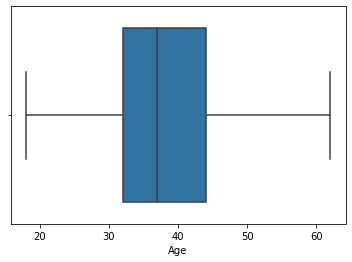

In [40]:
sns.boxplot(ds["Age"])

In [41]:
ds[ds["Age"]>ub]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Check for Categorical columns and perform encoding

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([('oh',OneHotEncoder(),[1,2])],remainder='passthrough')
x=ct.fit_transform(x)
print(x.shape)

(10000, 13)


In [43]:
# saving the data
import joblib
joblib.dump(ct,"churnct.pkl")

['churnct.pkl']

# Split the data into training and testing

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(8000, 13)
(2000, 13)


In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [46]:
joblib.dump(sc,"churnsc.pkl")

['churnsc.pkl']